**Installation of Libraries**

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

import os
import cv2
import numpy as np
import zipfile
import random
import matplotlib.pyplot as plt

**Extracting Zip Files**

In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Specify the path of the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/train.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train')

# Create a directory to save preprocessed images
output_folder = '/content/preprocessed_images'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

Mounted at /content/drive


**Preprocessing**

In [ ]:
def noise_reduction(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# 2. Color normalization
def color_normalization(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# 3. Image resizing
def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size)

# 4. Normalization
def normalize_image(image):
    return image / 255.0

# 5. Image enhancement
def enhance_image(image, alpha=1.5, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


**Original file count**

In [ ]:
total_images_found = 0

image_paths = []
valid_extensions = ('png', 'jpg', 'jpeg', 'bmp', 'tiff')

for root, dirs, files in os.walk('/content/train/train'):
    for file in files:
        if file.lower().endswith(valid_extensions):
            image_path = os.path.join(root, file)
            image_paths.append(image_path)
            total_images_found += 1

print(f"Total images found: {total_images_found}")

Total images found: 70295


**Preprocessed file count**

In [11]:
preprocessed_count = 0
for image_path in image_paths:
    try:
        original_image = cv2.imread(image_path)


        if original_image is None:
            print(f"Could not read image: {image_path}")
            continue

        # Preprocess the image
        noise_reduced_image = noise_reduction(original_image)
        color_normalized_image = color_normalization(noise_reduced_image)
        resized_image = resize_image(color_normalized_image)
        enhanced_image = enhance_image(resized_image)
        normalized_image = normalize_image(enhanced_image)

        # Save the preprocessed images in the output folder
        file_name = os.path.basename(image_path)
        cv2.imwrite(os.path.join(output_folder, f"original_{file_name}"), original_image)
        cv2.imwrite(os.path.join(output_folder, f"noise_reduced_{file_name}"), noise_reduced_image)
        cv2.imwrite(os.path.join(output_folder, f"color_normalized_{file_name}"), color_normalized_image)
        cv2.imwrite(os.path.join(output_folder, f"resized_{file_name}"), resized_image)
        cv2.imwrite(os.path.join(output_folder, f"enhanced_{file_name}"), enhanced_image)
        cv2.imwrite(os.path.join(output_folder, f"normalized_{file_name}"), (normalized_image * 255).astype(np.uint8))  # Convert back to uint8 for saving

        preprocessed_count += 1

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")


print(f"Total preprocessed images: {preprocessed_count}")

Total preprocessed images: 70295


**Sample Images**

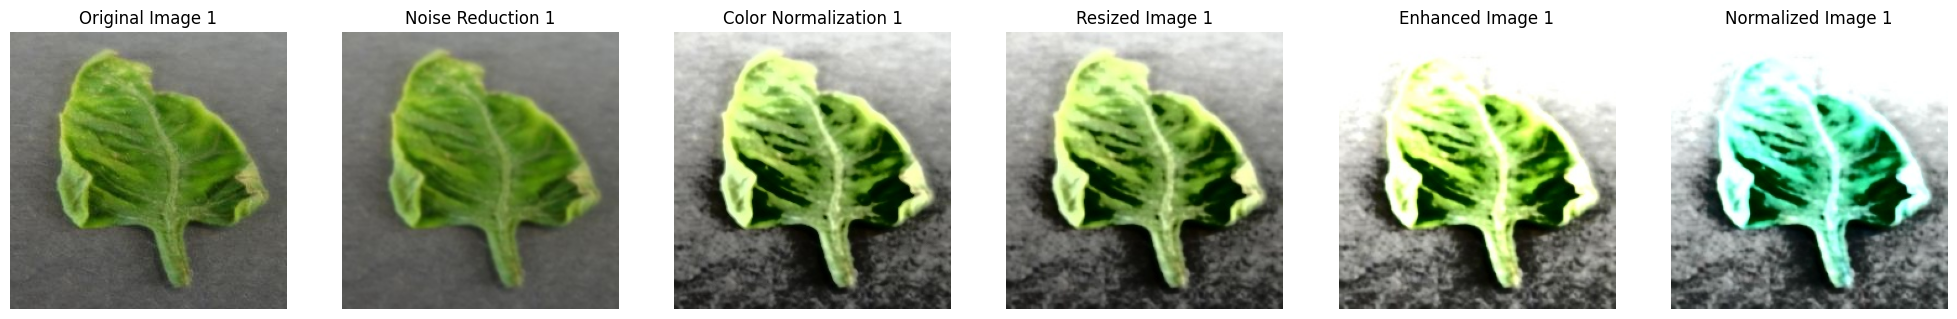

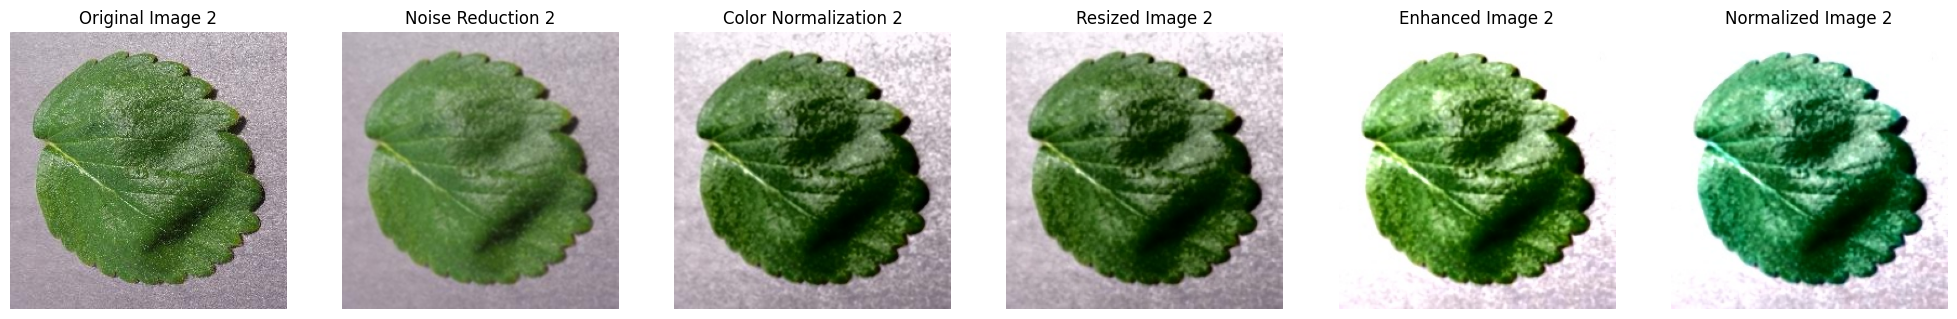

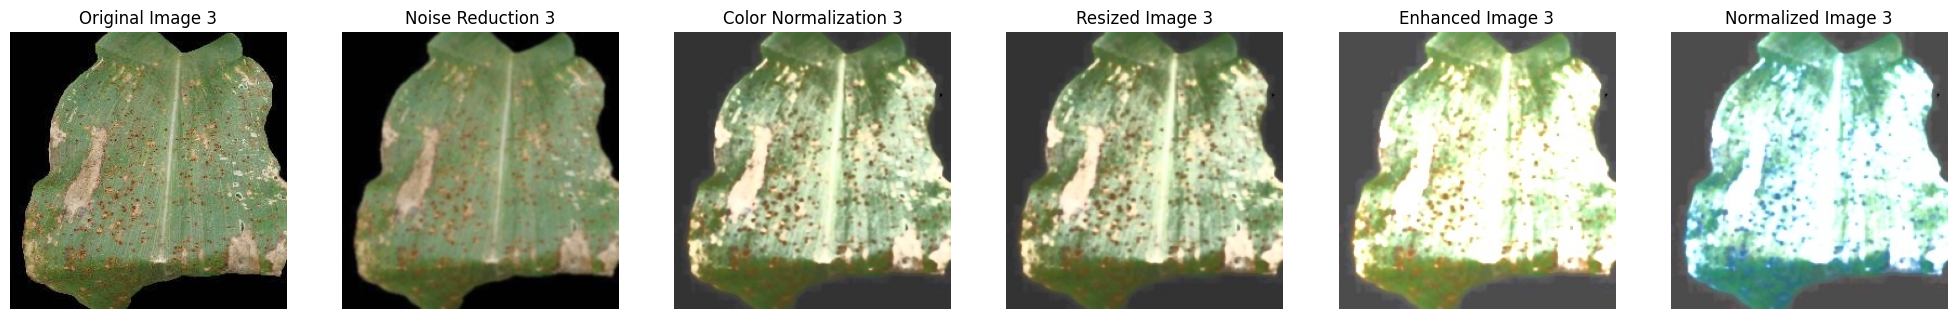

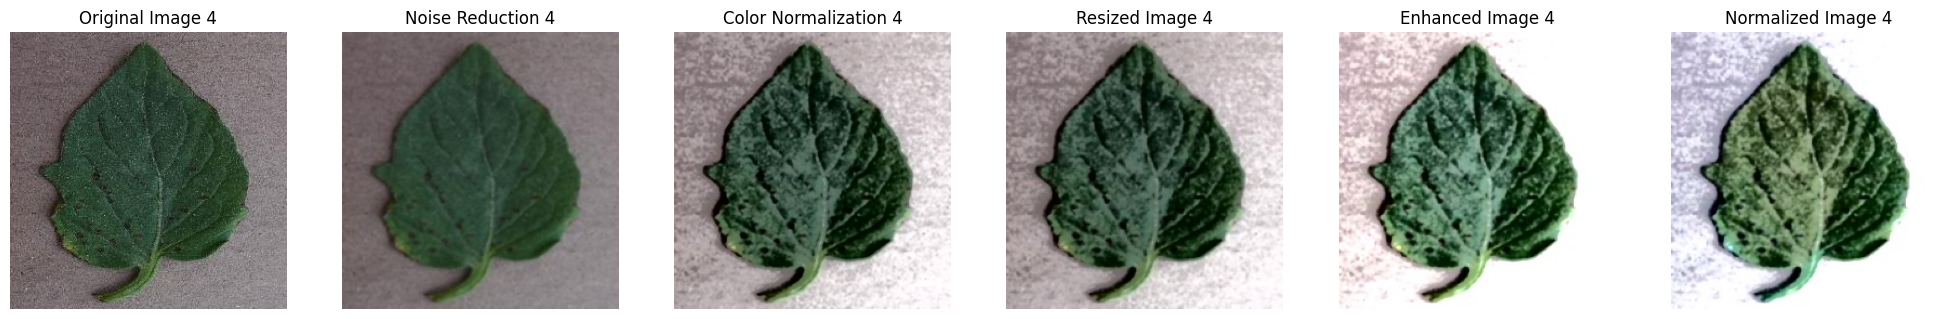

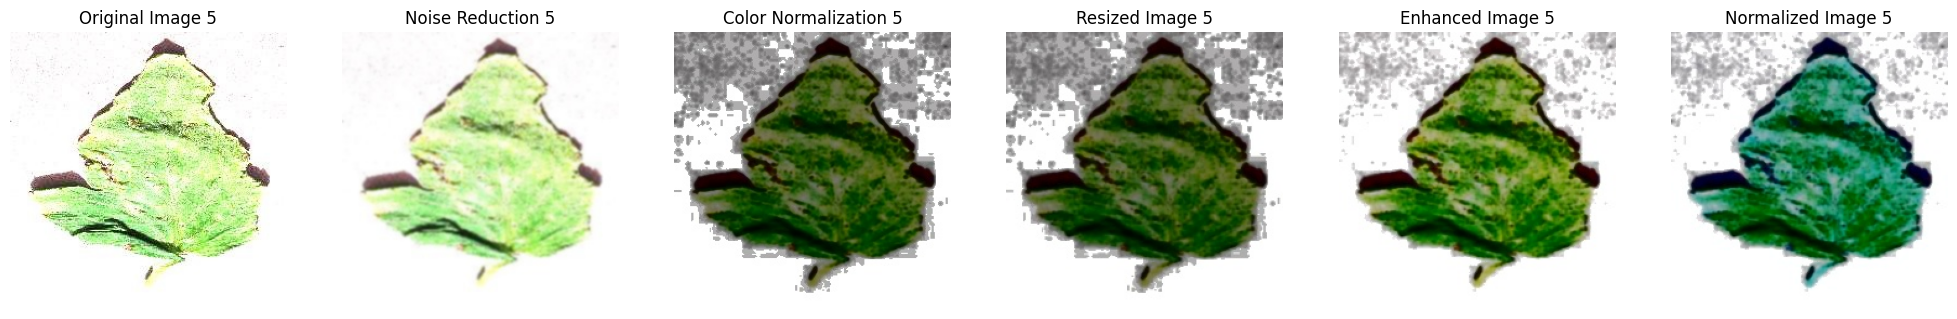

In [ ]:
random_preprocessed_images = random.sample(image_paths, 5)

for i, random_image_path in enumerate(random_preprocessed_images):
    file_name = os.path.basename(random_image_path)

    # Read the preprocessed images
    original_image = cv2.imread(os.path.join(output_folder, f"original_{file_name}"))
    noise_reduced_image = cv2.imread(os.path.join(output_folder, f"noise_reduced_{file_name}"))
    color_normalized_image = cv2.imread(os.path.join(output_folder, f"color_normalized_{file_name}"))
    resized_image = cv2.imread(os.path.join(output_folder, f"resized_{file_name}"))
    enhanced_image = cv2.imread(os.path.join(output_folder, f"enhanced_{file_name}"))
    normalized_image = cv2.imread(os.path.join(output_folder, f"normalized_{file_name}"))

    # Display the original and preprocessed images
    fig, axes = plt.subplots(1, 6, figsize=(25, 5))

    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f"Original Image {i+1}")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(noise_reduced_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"Noise Reduction {i+1}")
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(color_normalized_image, cv2.COLOR_BGR2RGB))
    axes[2].set_title(f"Color Normalization {i+1}")
    axes[2].axis('off')

    axes[3].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    axes[3].set_title(f"Resized Image {i+1}")
    axes[3].axis('off')

    axes[4].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axes[4].set_title(f"Enhanced Image {i+1}")
    axes[4].axis('off')

    axes[5].imshow(normalized_image)
    axes[5].set_title(f"Normalized Image {i+1}")
    axes[5].axis('off')

    plt.show()


In [12]:
import shutil
import os

# Path to the preprocessed images directory
preprocessed_dir = '/content/preprocessed_images'

# Define the output zip file name
zip_file_name = '/content/dataset/preprocessed_images.zip'

# Create a zip file from the preprocessed images folder
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', preprocessed_dir)

print(f"Preprocessed images zipped to: {zip_file_name}")


Preprocessed images zipped to: /content/dataset/preprocessed_images.zip
